# Generating Multivariate Random Noise Samples
Define two distributions, the one of interest and the standard normal distribution.

$$\sigma \sim \mathcal{N}(\mu, \Sigma)$$
$$\omega \sim \mathcal{N}(0, I)$$

Using diagonalization, you can decompose the covariance $\sigma$ into a product of a matrix of its eigenvectors $E$ and a vector of its eigenvalues $\lambda$
$$\begin{align*}
\Sigma &= E \lambda E^T\\
&=E \lambda^{\frac{1}{2}} I \lambda^{\frac{1}{2}} E^T\\
&= HIH^T
\end{align*}
$$

The distributions $\sigma$ and $\omega$ may now be related by $\sigma \sim \mathcal{N}(\mu, HIH^T)$ where $\sigma = \mu + H \omega$.

## Generating Samples

Define some $\mu$ and $\sigma$ and decompose $\sigma$ into its eigenvalues $\lambda$ and eigenvectors $E$. Given those, a sample can be generated with

$$
\sigma = \mu + E \lambda^{\frac{1}{2}} \text{randn(n,1)}
$$

In Python, we can create a function that returns the function for generating the samples. We pass it the parameters of the distribution which will be captured in the returned function's *closure*. Basically, the inner function has access to the values in the outer function allowing us to generate samplers for multiple distributions all with one function.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def function_for_2d_distribution(mean, covariance):
    """Returns a function which generates a sample for the given 2-dimensional mean and covariance
    """
    eigenvalues, eigenvectors = np.linalg.eig(covariance)
    eigenvalues_matrix = np.diag(eigenvalues)
    
    def sample_distribution(size):
        """Returns a 2-tuple of x_samples and y_samples of a given size from the distribution in the outer function
        """
        if size < 0:
            return [], []
        
        x_samples = []
        y_samples = []
        for i in range(size):
            # Numpy multiplication is element-wise by default, have to use np.dot in order to do
            # matrix-matrix multiplication until Python 3.5 releases with the `@` operator
            sample = mean + eigenvectors.dot(np.sqrt(eigenvalues_matrix)).dot(np.random.randn(2, 1))
            x_samples.append(sample[0][0])
            y_samples.append(sample[1][0])
        return x_samples, y_samples
    
    return sample_distribution

## Example
Say we have a distribution centred at $\mu = \begin{bmatrix}0\\0\end{bmatrix}$ with covariance $\Sigma = \begin{bmatrix}4 & 4\\ 4 & 8\end{bmatrix}$. We can generate the function which can give us samples from this distribution by calling

`function_for_2d_distribution([[0], [0]], [[4, 4], [4, 8]])`

This will return a function which we can then call to obtain samples.

In [2]:
get_sample_from_distribution = function_for_2d_distribution([[0], [0]], [[4, 4], [4, 8]])

Let's see how our samples look. We should expect a plot centred at $(0, 0)$ with most samples being either in the top-right quadrant or the bottom-left quadrant.

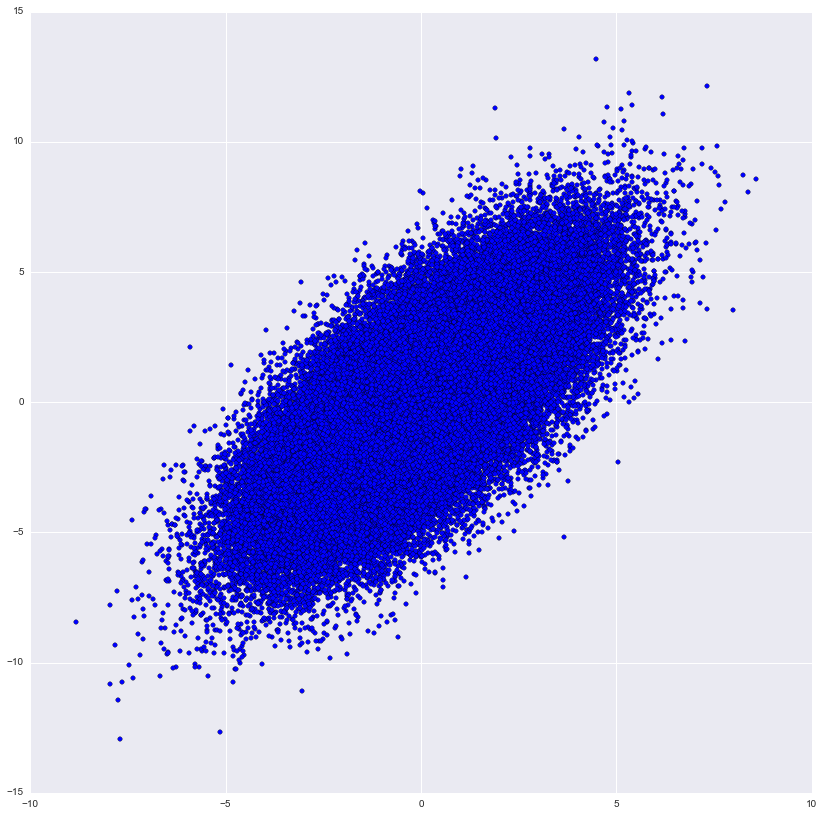

In [3]:
%matplotlib inline
x_samples, y_samples = get_sample_from_distribution(100000)
fig = plt.figure(figsize=(14,14))
plt.scatter(x_samples, y_samples)

## Extra: Jupyter Fun
Jupyter notebooks can be made interactive using widgets. Explore 2-dimensional Gaussian distributions below!

<function __main__.plot_distribution>

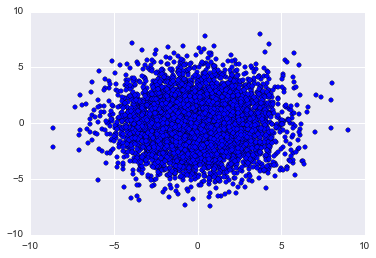

In [4]:
from ipywidgets import interact

def plot_distribution(mean_x, mean_y, variance_x, variance_y, covariance_xy, num_samples):
    mean = [[mean_x], [mean_y]]
    covariance = [[variance_x, covariance_xy], [covariance_xy, variance_y]]
    sample_from_distribution = function_for_2d_distribution(mean, covariance)
    x_samples, y_samples = sample_from_distribution(num_samples)
    plt.scatter(x_samples, y_samples)
    
interact(plot_distribution,
              mean_x=(-5, 5, 1),
              mean_y=(-5, 5, 1),
              variance_x=(0, 10, 1),
              variance_y=(0, 10, 1),
              covariance_xy=(-5, 5, 1),
              num_samples=(1000, 10000,100))